In [1]:
#installing the required libraries
!pip install geocoder
!pip install folium

#importing into the project environment
import pandas as pd
import requests
import numpy as np
import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests 
import json
import xml
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Requried libraries have been installed and imported")

     |████████████████████████████████| 98 kB 8.4 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 5.7 MB/s  eta 0:00:01
Requried libraries have been installed and imported


In [10]:
#url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" # changed since 14 Mar 2021
url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969"
df_temp = pd.read_html(url)[0]
df_temp
df = df_temp[((df_temp.Borough != 'Not assigned') & ( df_temp.Neighbourhood != 'Not assigned'))]
df.reset_index(inplace=True)
del df['index']
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [11]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_37311c93296c4a67a848173d08961377 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='or5blXgkUpvG63-LnlVW-P52P0eIyKvcWdO3vZ2IkBlT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_37311c93296c4a67a848173d08961377.get_object(Bucket='courseracapstone-donotdelete-pr-3yzyhbujpsnf0f',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
def get_ll(pc):
    lat = df_data_1[df_data_1['Postal Code'] == pc].iloc[0,1]
    long = df_data_1[df_data_1['Postal Code'] == pc].iloc[0,2]
    return lat,long

In [13]:
for i in range(len(df)):
    #get the lat and long for the postal code
    lat,long = get_ll(df.loc[i, "Postal Code"])
    #assign the lat and long to the entry in df_table
    df.loc[i, "Latitude"] = lat
    df.loc[i, "Longitude"] = long
    
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [14]:
dt_toronto = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
dt_toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [15]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="DT")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of', address, ' is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto  is 43.6541737, -79.38081164513409.


In [16]:
# creating map of Downtown Toronto using latitude and longitude 
dt_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(dt_map)  
    
dt_map

In [17]:
neighborhood_name = dt_toronto.loc[0, 'Neighbourhood'] # neighborhood name
neighborhood_latitude = dt_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dt_toronto.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [18]:
CLIENT_ID = 'LYMCIPW2MHEVHISR2GQKOJQQDXNOR02WOSJDAPRYSX5RKGY4'
CLIENT_SECRET = '3BODA5E4YHJMGKCECZYKDDOF51FWKCO24F5DYPM1AD44D24K'
VERSION = 20120610
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=LYMCIPW2MHEVHISR2GQKOJQQDXNOR02WOSJDAPRYSX5RKGY4&client_secret=3BODA5E4YHJMGKCECZYKDDOF51FWKCO24F5DYPM1AD44D24K&v=20120610&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
dt_toronto_venues = getNearbyVenues(names=dt_toronto['Neighbourhood'],
                                   latitudes=dt_toronto['Latitude'],
                                   longitudes=dt_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [23]:
print(dt_toronto_venues.shape)
dt_toronto_venues.head()

(1219, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [24]:
dt_toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,59,59,59,59,59,59
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,60,60,60,60,60,60
Christie,15,15,15,15,15,15
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [25]:
dt_toronto_restaurant = dt_toronto_venues[dt_toronto_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
dt_toronto_restaurant.index = np.arange(1, len(dt_toronto_restaurant)+1)
dt_toronto_restaurant['Venue Category'].value_counts()

Restaurant                         40
Japanese Restaurant                32
Italian Restaurant                 28
Seafood Restaurant                 22
Sushi Restaurant                   18
Thai Restaurant                    15
American Restaurant                13
Vegetarian / Vegan Restaurant      13
Asian Restaurant                   10
Fast Food Restaurant                9
Mexican Restaurant                  8
French Restaurant                   8
New American Restaurant             6
Chinese Restaurant                  6
Comfort Food Restaurant             5
Middle Eastern Restaurant           5
Caribbean Restaurant                4
Latin American Restaurant           4
Greek Restaurant                    4
Mediterranean Restaurant            4
Ramen Restaurant                    4
Gluten-free Restaurant              4
Vietnamese Restaurant               4
Indian Restaurant                   4
Modern European Restaurant          3
Colombian Restaurant                2
Korean Resta

In [26]:
# Creating top categories
topN = 10
dt_TopN = dt_toronto_restaurant['Venue Category'].value_counts()[0:topN].to_frame(name='frequency')
dt_TopN=dt_TopN.reset_index()
dt_TopN.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
dt_TopN

,Venue_Category,Frequency
0,Restaurant,40
1,Japanese Restaurant,32
2,Italian Restaurant,28
3,Seafood Restaurant,22
4,Sushi Restaurant,18
5,Thai Restaurant,15
6,American Restaurant,13
7,Vegetarian / Vegan Restaurant,13
8,Asian Restaurant,10
9,Fast Food Restaurant,9


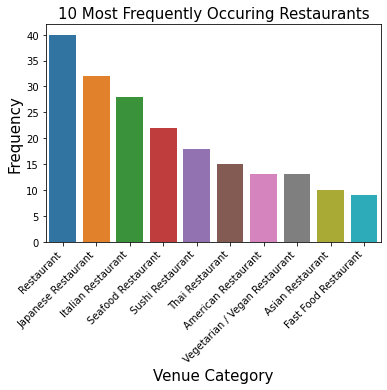

<Figure size 1296x504 with 0 Axes>

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=dt_TopN)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
title = str(topN) + " Most Frequently Occuring Restaurants"

plt.title(title, fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [28]:
print ("Data frame's dimension for Restaurants", dt_toronto_restaurant.shape)
dt_toronto_restaurant.head(50)

Data frame's dimension for Restaurants (296, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
2,"Regent Park, Harbourfront",43.654260,-79.360636,Souvlaki Express,43.655584,-79.364438,Greek Restaurant
3,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
5,"Regent Park, Harbourfront",43.654260,-79.360636,Izumi,43.649970,-79.360153,Asian Restaurant
6,"Regent Park, Harbourfront",43.654260,-79.360636,Flame Shack,43.656844,-79.358917,Restaurant
7,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant
8,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Como En Casa,43.665160,-79.384796,Mexican Restaurant
9,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Tokyo Sushi,43.665885,-79.386977,Sushi Restaurant
10,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Sushi Garden,43.664858,-79.384941,Sushi Restaurant


In [30]:
dt_toronto_restaurant_modified = dt_toronto_restaurant.groupby(['Neighbourhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [31]:
dt_toronto_restaurant_modified.head(5)

Neighbourhood
Berczy Park                       12
Central Bay Street                18
Christie                           2
Church and Wellesley              27
Commerce Court, Victoria Hotel    32
Name: Venue Category, dtype: int64

In [33]:
dt_toronto_restaurant_modified_df  = dt_toronto_restaurant_modified.to_frame().reset_index()
dt_toronto_restaurant_modified_df.columns = ['Neighborhood', 'Number of Restaurant']
dt_toronto_restaurant_modified_df.index = np.arange(1, len(dt_toronto_restaurant_modified_df)+1)
list_rest_no = dt_toronto_restaurant_modified_df['Number of Restaurant'].to_list()
list_dist = dt_toronto_restaurant_modified_df['Neighborhood'].to_list()
list_dist

['Berczy Park',
 'Central Bay Street',
 'Christie',
 'Church and Wellesley',
 'Commerce Court, Victoria Hotel',
 'First Canadian Place, Underground city',
 'Garden District, Ryerson',
 'Harbourfront East, Union Station, Toronto Islands',
 'Kensington Market, Chinatown, Grange Park',
 "Queen's Park, Ontario Provincial Government",
 'Regent Park, Harbourfront',
 'Richmond, Adelaide, King',
 'St. James Town',
 'St. James Town, Cabbagetown',
 'Stn A PO Boxes',
 'Toronto Dominion Centre, Design Exchange',
 'University of Toronto, Harbord']

In [34]:
# one hot encoding
dt_toronto_onehot = pd.get_dummies(dt_toronto_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_toronto_onehot['Neighbourhood'] = dt_toronto_restaurant['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_toronto_onehot.columns[-1]] + list(dt_toronto_onehot.columns[:-1])
dt_toronto_onehot = dt_toronto_onehot[fixed_columns]

dt_toronto_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Regent Park, Harbourfront",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
dt_toronto_onehot_grouped = dt_toronto_onehot.groupby('Neighbourhood').mean().reset_index()
dt_toronto_onehot_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.00000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.083333,0.000000,0.083333,0.000000,0.083333,0.000000
1,Central Bay Street,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.00000,0.000000,0.055556,0.166667,0.111111,0.055556,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.055556,0.055556,0.000000,0.111111,0.000000,0.055556,0.000000
2,Christie,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Church and Wellesley,0.037037,0.000000,0.000000,0.00000,0.037037,0.037037,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.00000,0.000000,0.037037,0.037037,0.185185,0.037037,0.000000,0.074074,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.111111,0.000000,0.185185,0.000000,0.037037,0.037037,0.000000,0.000000
4,"Commerce Court, Victoria Hotel",0.093750,0.062500,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.031250,0.000000,0.03125,0.000000,0.000000,0.125000,0.093750,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.031250,0.000000,0.000000,0.218750,0.093750,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000
5,"First Canadian Place, Underground city",0.093750,0.093750,0.000000,0.03125,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.03125,0.031250,0.000000,0.031250,0.125000,0.000000,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.156250,0.093750,0.062500,0.000000,0.062500,0.000000,0.031250,0.000000
6,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.00000,0.000000,0.047619,0.00000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.095238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.047619,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.095238,0.047619,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619
7,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.000000,0.00000,0.000000,0.071429,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.071429,0.214286,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.214286,0.071429,0.071429,0.000000,0.000000,0.00

In [36]:
total_top_venues = 10

for x in dt_toronto_onehot_grouped['Neighbourhood']:
    print("----"+ x +"----")
    temp = dt_toronto_onehot_grouped[dt_toronto_onehot_grouped['Neighbourhood'] == x].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(total_top_venues))
    print('\n')

----Berczy Park----
                           venue  freq
0             Seafood Restaurant  0.17
1                     Restaurant  0.17
2              French Restaurant  0.08
3  Vegetarian / Vegan Restaurant  0.08
4            Japanese Restaurant  0.08
5                Thai Restaurant  0.08
6               Sushi Restaurant  0.08
7        Comfort Food Restaurant  0.08
8    Eastern European Restaurant  0.08
9               Greek Restaurant  0.08


----Central Bay Street----
                        venue  freq
0          Italian Restaurant  0.17
1         Japanese Restaurant  0.11
2             Thai Restaurant  0.11
3       Portuguese Restaurant  0.06
4           Indian Restaurant  0.06
5   Middle Eastern Restaurant  0.06
6  Modern European Restaurant  0.06
7           French Restaurant  0.06
8          Falafel Restaurant  0.06
9           Korean Restaurant  0.06


----Christie----
                             venue  freq
0               Italian Restaurant   0.5
1                       R

In [37]:
def most_common_venues(row, total_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:total_top_venues]

In [101]:
total_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(total_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = dt_toronto_onehot_grouped['Neighbourhood']

for ind in np.arange(dt_toronto_onehot_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(dt_toronto_onehot_grouped.iloc[ind, :], total_top_venues)

neighbourhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Restaurant,Seafood Restaurant,Comfort Food Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,French Restaurant,Sushi Restaurant,Thai Restaurant
1,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
2,Christie,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
3,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Mexican Restaurant,Caribbean Restaurant,Chinese Restaurant,Indian Restaurant
4,"Commerce Court, Victoria Hotel",Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Gluten-free Restaurant,Molecular Gastronomy Restaurant
5,"First Canadian Place, Underground city",Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Mediterranean Restaurant,Brazilian Restaurant,Colombian Restaurant
6,"Garden District, Ryerson",Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
7,"Harbourfront East, Union Station, Toronto Islands",Italian Restaurant,Restaurant,Mexican Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant
8,"Kensington Market, Chinatown, Grange Park",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Filipino Restaurant
9,"Queen's Park, Ontario Provincial Government",Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [102]:
# setting the number of clusters
kmean_clusters = 5

dt_toronto_clustering = dt_toronto_onehot_grouped.drop('Neighbourhood', 1)

# Let's run k-means clustering
k_means = KMeans(n_clusters=kmean_clusters, random_state=0).fit(dt_toronto_clustering)

# Let's check cluster labels generated for each row in the dataframe
k_means.labels_[0:10]
#dt_toronto_clustering

array([0, 0, 3, 2, 0, 0, 0, 0, 1, 2], dtype=int32)

In [103]:
#IS THIS REQUIRED?  PLEASE CHECK
dt_toronto_merged = dt_toronto
dt_toronto_merged.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [104]:
# assigning the value to a new variable so that the original is unaltered when we add labels
neighbourhoods_venues_sorted_w_clusters = ''
neighbourhoods_venues_sorted_w_clusters = neighbourhoods_venues_sorted
neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Restaurant,Seafood Restaurant,Comfort Food Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,French Restaurant,Sushi Restaurant,Thai Restaurant
1,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
2,Christie,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
3,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Mexican Restaurant,Caribbean Restaurant,Chinese Restaurant,Indian Restaurant
4,"Commerce Court, Victoria Hotel",Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Gluten-free Restaurant,Molecular Gastronomy Restaurant
5,"First Canadian Place, Underground city",Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Mediterranean Restaurant,Brazilian Restaurant,Colombian Restaurant
6,"Garden District, Ryerson",Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
7,"Harbourfront East, Union Station, Toronto Islands",Italian Restaurant,Restaurant,Mexican Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant
8,"Kensington Market, Chinatown, Grange Park",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Filipino Restaurant
9,"Queen's Park, Ontario Provincial Government",Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [105]:
# add clustering labels
#neighbourhoods_venues_sorted_w_clusters.drop('Cluster Labels')
neighbourhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', k_means.labels_)
neighbourhoods_venues_sorted_w_clusters.head(5)

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Restaurant,Seafood Restaurant,Comfort Food Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,French Restaurant,Sushi Restaurant,Thai Restaurant
1,0,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
2,3,Christie,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
3,2,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Mexican Restaurant,Caribbean Restaurant,Chinese Restaurant,Indian Restaurant
4,0,"Commerce Court, Victoria Hotel",Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Gluten-free Restaurant,Molecular Gastronomy Restaurant


In [129]:
dt_toronto_merged_updated = dt_toronto_merged.join(neighbourhoods_venues_sorted_w_clusters.set_index('Neighbourhood'), on='Neighbourhood')
dt_toronto_merged_updated = dt_toronto_merged_updated[dt_toronto_merged_updated['Cluster Labels'].notna()]
dt_toronto_merged_updated.reset_index(drop=True)
dt_toronto_merged_updated['Cluster Labels'] = dt_toronto_merged_updated['Cluster Labels'].astype(int)
dt_toronto_merged_updated
#dt_toronto_merged_updated.iloc[0:len(dt_toronto_merged_updated)-1,5].astype(int).to_frame()
#dt_toronto_merged_updated.iloc[0:len(dt_toronto_merged_updated)-1,5] = dt_toronto_merged_updated.iloc[0:len(dt_toronto_merged_updated)-1,5].astype(int).to_frame()
#dt_toronto_merged_updated['Cluster Labels'].replace()
#dt_toronto_merged_updated['Cluster labels'] = dt_toronto_merged_updated['Cluster labels'].astype(int)
#dt_toronto_merged_updated
#dt_toronto_merged['Cluster labels'] = dt_toronto_merged['Cluster labels'].astype(int)
#dt_toronto_merged.head(10)
#dt_toronto_merged['Cluster Labels'] = int(dt_toronto_merged['Cluster Labels']) * 1
#dt_toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Greek Restaurant,Vietnamese Restaurant,Eastern European Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Italian Restaurant,Seafood Restaurant,Moroccan Restaurant,Restaurant,American Restaurant,Comfort Food Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Belgian Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Restaurant,Seafood Restaurant,Comfort Food Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,French Restaurant,Sushi Restaurant,Thai Restaurant
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Restaurant,Thai Restaurant,American Restaurant,Asian Restaurant,Sushi Restaurant,Seafood Restaurant,Colombian Restaurant,Gluten-free Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Italian Restaurant,Restaurant,Mexican Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Asian Restaurant,Fast Food Restaurant,New American Restaurant


In [130]:
# create a map with folium
map_restaurants_10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kmean_clusters)
ys = [i + x + (i*x)**2 for i in range(kmean_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(dt_toronto_merged_updated['Latitude'], 
                                  dt_toronto_merged_updated['Longitude'], 
                                  dt_toronto_merged_updated['Neighbourhood'], 
                                  dt_toronto_merged_updated['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants_10)
       
map_restaurants_10

In [131]:
#examing cluster 1
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 0, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,0,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
3,Downtown Toronto,0,Italian Restaurant,Seafood Restaurant,Moroccan Restaurant,Restaurant,American Restaurant,Comfort Food Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Belgian Restaurant
4,Downtown Toronto,0,Restaurant,Seafood Restaurant,Comfort Food Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,French Restaurant,Sushi Restaurant,Thai Restaurant
5,Downtown Toronto,0,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
7,Downtown Toronto,0,Restaurant,Thai Restaurant,American Restaurant,Asian Restaurant,Sushi Restaurant,Seafood Restaurant,Colombian Restaurant,Gluten-free Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant
8,Downtown Toronto,0,Italian Restaurant,Restaurant,Mexican Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant
9,Downtown Toronto,0,Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Asian Restaurant,Fast Food Restaurant,New American Restaurant
10,Downtown Toronto,0,Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Gluten-free Restaurant,Molecular Gastronomy Restaurant
15,Downtown Toronto,0,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Molecular Gastronomy Restaurant,Sushi Restaurant
16,Downtown Toronto,0,Italian Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Eastern European Restaurant,French Restaurant


In [132]:
#examing cluster 2
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 1, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto,1,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Filipino Restaurant


In [133]:
#examing cluster 3
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 2, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,2,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
11,Downtown Toronto,2,Japanese Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Comfort Food Restaurant,Eastern European Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
18,Downtown Toronto,2,Sushi Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant,Mexican Restaurant,Caribbean Restaurant,Chinese Restaurant,Indian Restaurant


In [134]:
#examing cluster 4
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 3, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,3,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [135]:
#examing cluster 5
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 4, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,4,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Greek Restaurant,Vietnamese Restaurant,Eastern European Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant


In [136]:
#examing cluster 6
dt_toronto_merged_updated.loc[dt_toronto_merged_updated['Cluster Labels'] == 5, dt_toronto_merged_updated.columns[[1] + list(range(5, dt_toronto_merged_updated.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
